<a href="https://colab.research.google.com/github/sdevkhile/CampusPlacementPredictor/blob/main/Insurance_Cross_selling_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing necessary libraries

import sys,os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
sns.set()

%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')

In [5]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [6]:
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1
11504797,11504797,Male,25,1,28.0,1,< 1 Year,No,32855.0,152.0,189,0


In [7]:
data.shape

(11504798, 12)

In [8]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [11]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [12]:
pd.options.display.float_format='{:.2f}'.format

In [13]:
data[1:].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,11504797.00,11504797.00,11504797.00,11504797.00,11504797.00,11504797.00,11504797.00,11504797.00,11504797.00
mean,5752399.00,38.38,1.00,26.42,0.46,30461.37,112.43,163.90,0.12
std,3321148.97,14.99,0.04,12.99,0.50,16454.74,54.04,79.98,0.33
min,1.00,20.00,0.00,0.00,0.00,2630.00,1.00,10.00,0.00
25%,2876200.00,24.00,1.00,15.00,0.00,25277.00,29.00,99.00,0.00
50%,5752399.00,36.00,1.00,28.00,0.00,31824.00,151.00,166.00,0.00
75%,8628598.00,49.00,1.00,35.00,1.00,39451.00,152.00,232.00,0.00
max,11504797.00,85.00,1.00,52.00,1.00,540165.00,163.00,299.00,1.00


In [14]:
data['Response'].value_counts(normalize=True)*100

Response
0   87.70
1   12.30
Name: proportion, dtype: float64

<Axes: xlabel='Response'>

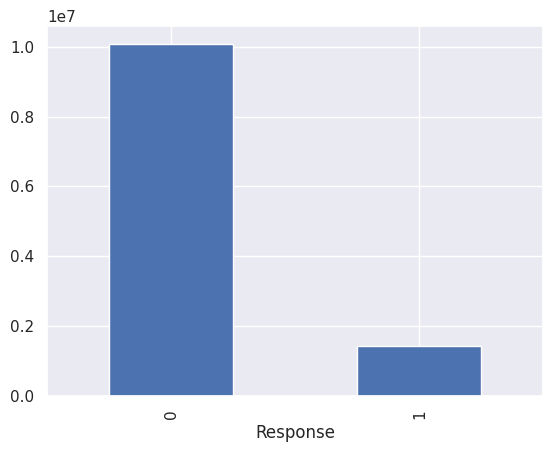

In [15]:
data['Response'].value_counts().plot(kind='bar')

In [16]:
data.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,11504798,11504798,11504798
unique,2,3,2
top,Male,1-2 Year,Yes
freq,6228134,5982678,5783229


In [17]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

<Axes: ylabel='count'>

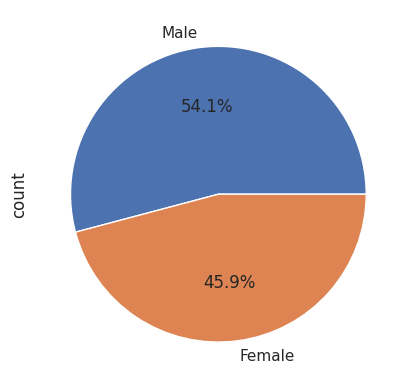

In [18]:
data['Gender'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: xlabel='Age', ylabel='Density'>

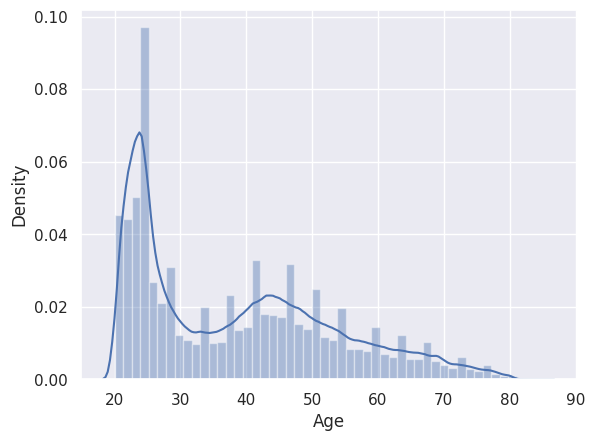

In [19]:
sns.distplot(data['Age'])

Very few people do not have driving license.

In [20]:
data['Driving_License'].value_counts()

Driving_License
1    11482041
0       22757
Name: count, dtype: int64

In [21]:
pd.options.display.float_format= '{:.2f}'.format


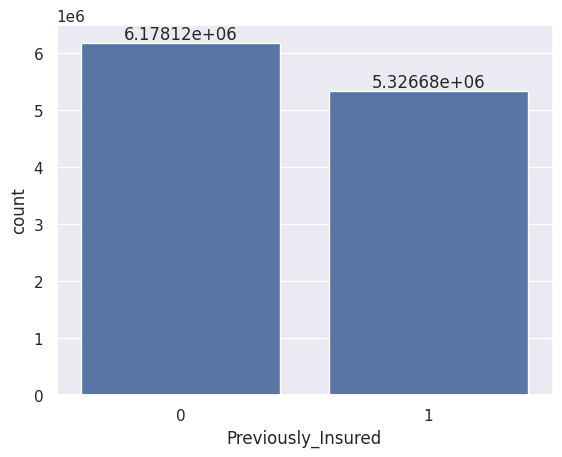

In [22]:
ax=sns.countplot(data=data, x=data['Previously_Insured'])
for i in ax.containers:
  ax.bar_label(i)

In [23]:
data.shape

(11504798, 12)

In [24]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

<Axes: xlabel='Vehicle_Age', ylabel='count'>

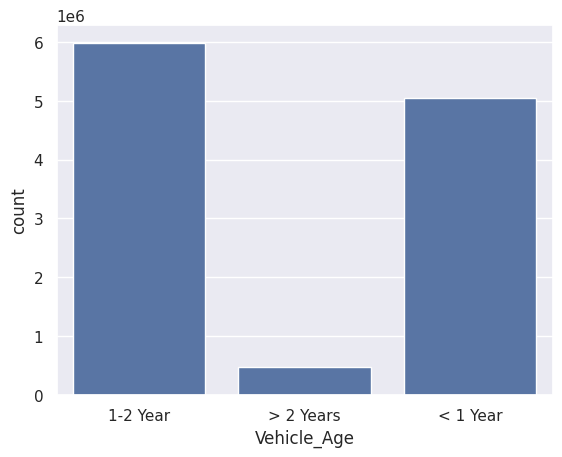

In [25]:
sns.countplot(data=data, x=data['Vehicle_Age'])

<Axes: ylabel='count'>

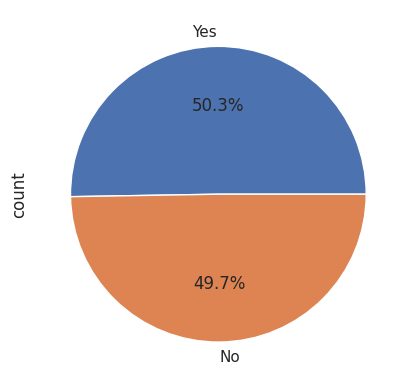

In [26]:
data['Vehicle_Damage'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [ ]:
sns.boxplot(data['Annual_Premium'], orient='h')

plt.show()

In [ ]:
data['Policy_Sales_Channel'].unique()

In [ ]:
data['Vintage'].nunique()

In [ ]:
data.select_dtypes('object').columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df= data.copy()
le =LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage']= le.fit_transform(df['Vehicle_Damage'])

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True)

In [ ]:
prev = df.pivot_table(index='Vehicle_Damage', columns='Previously_Insured', aggfunc='size')
prev

In [ ]:
prev.rename(columns={0:'No',1:'Yes'}, index={0:'Not_Damaged',1:'Damaged'}, inplace=True)
prev

In [ ]:
prev.plot(kind='bar', stacked=False)

In [ ]:
df.columns

In [ ]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=32, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss= StandardScaler()
x_train_s = ss.fit_transform(x_train)
x_test_s = ss.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression(random_state=32)

In [ ]:
lr.fit(x_train_s,y_train)

In [ ]:
y_pred_lr= lr.predict(x_test_s)

In [ ]:
y_pred_lr_train = lr.predict(x_train_s)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test,y_pred_lr)

In [ ]:
accuracy_score(y_train,y_pred_lr_train)

In [ ]:
print(classification_report(y_test,y_pred_lr))